In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


season_21 = pd.read_csv('data/pitches_21.csv')
season_22 = pd.read_csv('data/pitches_21.csv')
season_23 = pd.read_csv('data/pitches_21.csv')

In [63]:
season_21.columns

Index(['Unnamed: 0', 'gameid', 'GameDate', 'ab', 'pitchnum', 'inning',
       'teambat', 'balls', 'strikes', 'outs', 'pitcher', 'pitcherthrows',
       'batter', 'batterside', 'pitchresult', 'pitchresult_desc', 'eventtype',
       'pitchname', 'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name'],
      dtype='object')

In [64]:
season_22.dtypes

Unnamed: 0            int64
gameid               object
GameDate             object
ab                    int64
pitchnum              int64
inning              float64
teambat               int64
balls               float64
strikes             float64
outs                float64
pitcher              object
pitcherthrows        object
batter               object
batterside           object
pitchresult          object
pitchresult_desc     object
eventtype            object
pitchname            object
pitchname_desc       object
spinrate            float64
relspeed            float64
horzbreak           float64
inducedvertbreak    float64
platelocside        float64
platelocheight      float64
hometeam_id           int64
Home                 object
awayteam_id           int64
Visitor              object
venue_id              int64
venue_name           object
dtype: object

## Adding a Date and Time Column with datetime pandas objects 

In [65]:
season_21['GameDate'] = pd.to_datetime(season_21['GameDate'])
season_21['Date'] = season_21['GameDate'].dt.date
season_21['Time'] = season_21['GameDate'].dt.time

cols = list(season_21.columns)
# find index of GameDate
idx = cols.index('GameDate')
# Basically put Date and Time right next to GameDate 
new_cols = cols[:idx + 1] + ['Date', 'Time'] + cols[idx + 1:-2]

season_21 = season_21[new_cols].copy()
season_21

,Unnamed: 0,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,1,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,1,4.0,1,0.0,...,14.701180,7.648054,0.143656,1.514166,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,2,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,2,4.0,1,0.0,...,-2.161110,4.845070,1.277162,1.246100,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,3,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,31,3,4.0,1,1.0,...,13.426973,11.059589,-0.826248,2.734800,115,Colorado Rockies,121,New York Mets,19,Coors Field
3,4,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,32,1,4.0,1,0.0,...,14.428921,7.975150,0.330990,1.054213,115,Colorado Rockies,121,New York Mets,19,Coors Field
4,5,2021/04/17/nynmlb-colmlb-2,2021-04-16 20:33:00,2021-04-16,20:33:00,35,1,5.0,0,0.0,...,3.791252,10.746025,0.064407,3.774802,115,Colorado Rockies,121,New York Mets,19,Coors Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706904,706905,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,2021-10-02,23:15:00,42,8,5.0,1,0.0,...,12.777756,5.362740,-0.295482,2.166446,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706905,706906,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,2021-10-02,23:15:00,43,1,5.0,1,0.0,...,7.615064,-0.164651,-0.438475,1.132619,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706906,706907,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,2021-10-02,23:15:00,43,2,5.0,1,0.0,...,5.507193,14.064531,0.894155,2.744111,144,Atlanta Braves,121,New York Mets,4705,Truist Park
706907,706908,2021/10/02/nynmlb-atlmlb-1,2021-10-02 23:15:00,2021-10-02,23:15:00,43,3,5.0,1,1.0,...,5.922451,13.146690,0.216244,3.111117,144,Atlanta Braves,121,New York Mets,4705,Truist Park


## Sorting the DataFrame chronologically - then by Team Name, and then by "at bats"

In [68]:
season_21  = season_21.sort_values(by = ['Date', 'Home', 'ab'])
# season_21 = season_21.drop(columns = ['Unnamed: 0'])
season_21
season_21.to_csv('data/pitches.csv')



In [17]:
season_22.head(20)

,Unnamed: 0,gameid,GameDate,ab,pitchnum,inning,teambat,balls,strikes,outs,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,1,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,1,4.0,1,0.0,0.0,1.0,...,14.701180,7.648054,0.143656,1.514166,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,2,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,2,4.0,1,0.0,1.0,1.0,...,-2.161110,4.845070,1.277162,1.246100,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,3,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,3,4.0,1,1.0,1.0,1.0,...,13.426973,11.059589,-0.826248,2.734800,115,Colorado Rockies,121,New York Mets,19,Coors Field
3,4,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,1,4.0,1,0.0,0.0,1.0,...,14.428921,7.975150,0.330990,1.054213,115,Colorado Rockies,121,New York Mets,19,Coors Field
4,5,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,35,1,5.0,0,0.0,0.0,1.0,...,3.791252,10.746025,0.064407,3.774802,115,Colorado Rockies,121,New York Mets,19,Coors Field
5,6,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,2,4.0,1,1.0,0.0,1.0,...,15.674111,7.154369,-0.638243,1.884003,115,Colorado Rockies,121,New York Mets,19,Coors Field
6,7,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,3,4.0,1,1.0,1.0,1.0,...,14.973265,8.511888,-1.296625,2.196844,115,Colorado Rockies,121,New York Mets,19,Coors Field
7,8,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,4,4.0,1,1.0,2.0,1.0,...,-1.077158,5.260902,-0.114617,2.546066,115,Colorado Rockies,121,New York Mets,19,Coors Field
8,9,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,33,1,4.0,1,0.0,0.0,2.0,...,12.063048,9.522058,-0.639474,2.198678,115,Colorado Rockies,121,New York Mets,19,Coors Field
9,10,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,33,2,4.0,1,0.0,1.0,2.0,...,4.873104,6.592208,0.492799,2.455150,115,Colorado Rockies,121,New York Mets,19,Coors Field


In [18]:
season_23.head()

,Unnamed: 0,gameid,GameDate,ab,pitchnum,inning,teambat,balls,strikes,outs,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,1,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,1,4.0,1,0.0,0.0,1.0,...,14.701180,7.648054,0.143656,1.514166,115,Colorado Rockies,121,New York Mets,19,Coors Field
1,2,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,2,4.0,1,0.0,1.0,1.0,...,-2.161110,4.845070,1.277162,1.246100,115,Colorado Rockies,121,New York Mets,19,Coors Field
2,3,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,31,3,4.0,1,1.0,1.0,1.0,...,13.426973,11.059589,-0.826248,2.734800,115,Colorado Rockies,121,New York Mets,19,Coors Field
3,4,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,32,1,4.0,1,0.0,0.0,1.0,...,14.428921,7.975150,0.330990,1.054213,115,Colorado Rockies,121,New York Mets,19,Coors Field
4,5,2021/04/17/nynmlb-colmlb-2,4/16/2021 20:33,35,1,5.0,0,0.0,0.0,1.0,...,3.791252,10.746025,0.064407,3.774802,115,Colorado Rockies,121,New York Mets,19,Coors Field


## All the dataframes are the same shape!

In [19]:
print(f"shape for 21: \n {season_21.shape}")
print(f"shape for 22: \n {season_22.shape}")
print(f"shape for 23: \n {season_23.shape}")

shape for 21: 
 (706909, 33)
shape for 22: 
 (706909, 31)
shape for 23: 
 (706909, 31)


In [20]:
print(f"unique for 21: \n {season_21.nunique()}")

unique for 21: 
 Unnamed: 0          706909
gameid                2423
GameDate              1561
Date                   183
Time                   107
ab                     123
pitchnum                16
inning                  16
teambat                  2
balls                    4
strikes                  4
outs                     3
pitcher                907
pitcherthrows            2
batter                1047
batterside               2
pitchresult             16
pitchresult_desc        16
eventtype               46
pitchname               14
pitchname_desc          14
spinrate            653447
relspeed            619685
horzbreak           700866
inducedvertbreak    696006
platelocside        703379
platelocheight      692680
hometeam_id             30
Home                    30
awayteam_id             30
Visitor                 30
venue_id                32
venue_name              33
dtype: int64


In [21]:
print(f"unique for 22: \n {season_22.nunique()}")

unique for 22: 
 Unnamed: 0          706909
gameid                2423
GameDate              1561
ab                     123
pitchnum                16
inning                  16
teambat                  2
balls                    4
strikes                  4
outs                     3
pitcher                907
pitcherthrows            2
batter                1047
batterside               2
pitchresult             16
pitchresult_desc        16
eventtype               46
pitchname               14
pitchname_desc          14
spinrate            653447
relspeed            619685
horzbreak           700866
inducedvertbreak    696006
platelocside        703379
platelocheight      692680
hometeam_id             30
Home                    30
awayteam_id             30
Visitor                 30
venue_id                32
venue_name              33
dtype: int64


In [22]:
print(f"unique for 23: \n {season_23.nunique()}")
# it seems like there are 2423 unique entries in each df 


unique for 23: 
 Unnamed: 0          706909
gameid                2423
GameDate              1561
ab                     123
pitchnum                16
inning                  16
teambat                  2
balls                    4
strikes                  4
outs                     3
pitcher                907
pitcherthrows            2
batter                1047
batterside               2
pitchresult             16
pitchresult_desc        16
eventtype               46
pitchname               14
pitchname_desc          14
spinrate            653447
relspeed            619685
horzbreak           700866
inducedvertbreak    696006
platelocside        703379
platelocheight      692680
hometeam_id             30
Home                    30
awayteam_id             30
Visitor                 30
venue_id                32
venue_name              33
dtype: int64


## Looking for duplicates 

In [23]:
duplicates = season_21.duplicated()
print(duplicates.sum())
duplicates = season_22.duplicated()
print(duplicates.sum())
duplicates = season_23.duplicated()
print(duplicates.sum())
# no duplicates lets go 

0
0
0


## Creating a barplot displaying the frequency of each pitch type for each pitch result 

In [24]:
grouped_data = season_21.groupby(['pitchresult', 'pitchname']).size().reset_index(name='count')

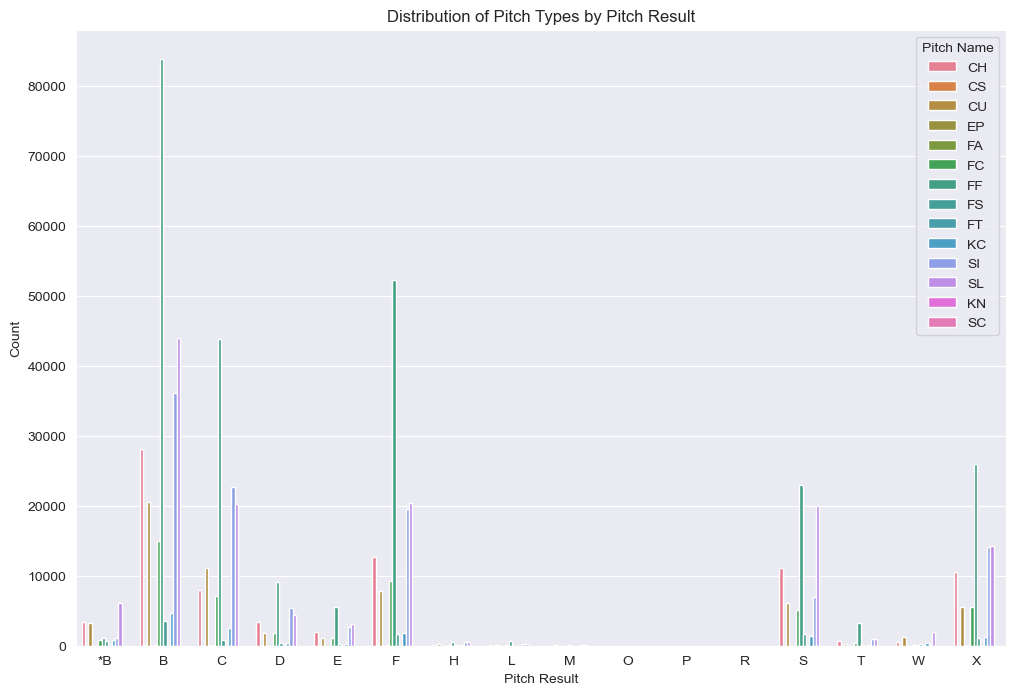

In [25]:
plt.figure(figsize=(12, 8))

# Making a barplot 
sns.barplot(x='pitchresult', y='count', hue='pitchname', data=grouped_data)

# Adding titles and labels
plt.title('Distribution of Pitch Types by Pitch Result')
plt.xlabel('Pitch Result')
plt.ylabel('Count')

plt.legend(title='Pitch Name')
plt.show()


## Showing what the Pitch Name and Pitch Result shorthands mean

In [26]:
# I have no idea what half the stuff means  
unique_pitch_results = season_21[['pitchresult', 'pitchresult_desc']].drop_duplicates()

unique_pitch_results

,pitchresult,pitchresult_desc
0,C,Strike - Called
1,B,Ball - Called
2,D,Hit Into Play - No Out(s)
5,F,Strike - Foul
7,S,Strike - Swinging
10,X,Hit Into Play - Out(s)
19,E,Hit Into Play - Run(s)
21,*B,Ball - Ball In Dirt
73,T,Strike - Foul Tip
260,H,Ball - Hit by Pitch


In [27]:
# I have no idea what half the stuff means (but for pitchnames) 
unique_pitch_results = season_21[['pitchname', 'pitchname_desc']].drop_duplicates()

print(unique_pitch_results.size)

unique_pitch_results

46


,pitchname,pitchname_desc
0,SI,Sinker
1,SL,Slider
2,FF,Four-seam FB
13,KC,Knuckle Curve
15,FC,Cutter
18,CH,Changeup
39,FS,Splitter
43,CU,Curveball
10955,FA,Fastball
15708,CS,Slow Curve


In [28]:
cluster_df = season_22.groupby(['pitchname']).size().reset_index(name='count')
cluster_df

,pitchname,count
0,CH,80621
1,CS,175
2,CU,59540
3,EP,43
4,FA,425
5,FC,46567
6,FF,248968
7,FS,10364
8,FT,90
9,KC,13544


In [29]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [30]:
features = ['relspeed', 'spinrate', 'horzbreak']
# I think that these three have different distributions & they are not all pos
scaler = StandardScaler()

season_21[features] = scaler.fit_transform(season_21[features])
X = season_21[features].dropna()

In [31]:
NA_rows = season_21[season_21.isna().any(axis=1)]
# we're looking at all the rows with NaN values - at first glance it seems as if there are ~1000 rows with no spinrate information 
NA_rows 

,Unnamed: 0,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
102,103,2021/04/18/chamlb-bosmlb-1,2021-04-18 13:10:00,2021-04-18,13:10:00,22,2,4.0,0,0.0,...,1.201042,-1.856899,-2.050000,1.906949,111,Boston Red Sox,145,Chicago White Sox,3,Fenway Park
186,187,2021/04/18/chamlb-bosmlb-1,2021-04-18 13:10:00,2021-04-18,13:10:00,9,2,2.0,0,1.0,...,1.316326,-2.622973,-0.822741,2.102813,111,Boston Red Sox,145,Chicago White Sox,3,Fenway Park
471,472,2021/04/30/colmlb-arimlb-1,2021-04-30 18:40:00,2021-04-30,18:40:00,14,1,2.0,1,0.0,...,1.243043,13.657915,-0.051415,2.425455,109,Arizona Diamondbacks,115,Colorado Rockies,15,Chase Field
472,473,2021/04/30/colmlb-arimlb-1,2021-04-30 18:40:00,2021-04-30,18:40:00,14,2,2.0,1,0.0,...,1.352461,11.040068,-1.175752,2.510438,109,Arizona Diamondbacks,115,Colorado Rockies,15,Chase Field
473,474,2021/04/30/colmlb-arimlb-1,2021-04-30 18:40:00,2021-04-30,18:40:00,14,3,2.0,1,1.0,...,-0.340559,4.667604,0.113392,1.747653,109,Arizona Diamondbacks,115,Colorado Rockies,15,Chase Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703166,703167,2021/09/29/arimlb-sfnmlb-1,2021-09-30 01:45:00,2021-09-30,01:45:00,28,2,4.0,0,1.0,...,-1.504737,0.821658,0.058737,2.493967,137,San Francisco Giants,109,Arizona Diamondbacks,2395,Oracle Park
703368,703369,2021/09/29/arimlb-sfnmlb-1,2021-09-30 01:45:00,2021-09-30,01:45:00,20,2,3.0,0,0.0,...,0.538684,-1.870884,-0.894691,1.755341,137,San Francisco Giants,109,Arizona Diamondbacks,2395,Oracle Park
703530,703531,2021/09/29/arimlb-sfnmlb-1,2021-09-30 01:45:00,2021-09-30,01:45:00,11,3,2.0,0,1.0,...,-1.548844,10.058648,-0.766961,1.907694,137,San Francisco Giants,109,Arizona Diamondbacks,2395,Oracle Park
704377,704378,2021/09/29/arimlb-sfnmlb-1,2021-09-30 01:45:00,2021-09-30,01:45:00,43,3,6.0,0,0.0,...,-1.381847,4.107842,1.018696,1.655178,137,San Francisco Giants,109,Arizona Diamondbacks,2395,Oracle Park


In [32]:
X

,relspeed,spinrate,horzbreak
0,0.649201,-0.419059,1.289134
1,0.142927,-0.045138,-0.331240
2,0.763269,-0.235874,1.166690
3,0.617457,-0.635576,1.262971
4,0.990089,-0.173002,0.240750
...,...,...,...
706904,0.567629,-0.251781,1.104303
706905,-0.572375,-3.687850,0.608197
706906,0.448551,-0.152175,0.405642
706907,0.601638,-0.023687,0.445546


In [33]:
# Time to Cluster :) 
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)

/Users/nathanglen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=42)

In [34]:
# Cluster assignments for each point 
X['cluster'] = kmeans.labels_

# Cluster centroids 
centroids = kmeans.cluster_centers_

In [35]:
# %matplotlib notebook

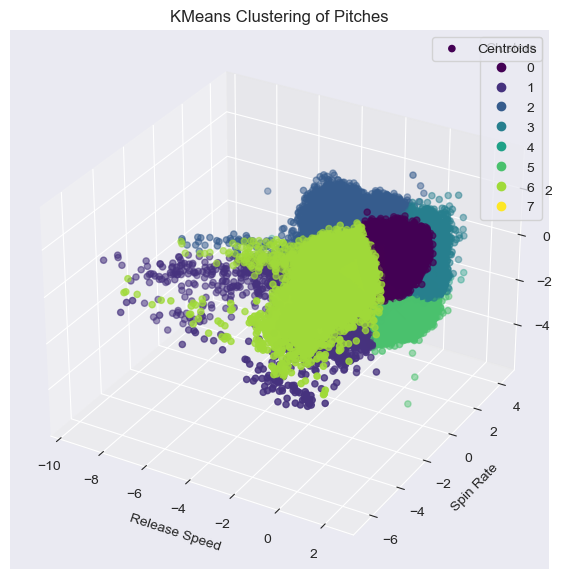

In [36]:
# Ensure that interactive mode is on
# plt.ion()  # Turns on interactive mode

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Give each cluster a diff color 
scatter = ax.scatter(X['relspeed'], X['spinrate'], X['horzbreak'], c=X['cluster'], cmap='viridis', marker='o')

# plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', marker='x', label='Centroids')

# labels
ax.set_xlabel('Release Speed')
ax.set_ylabel('Spin Rate')
ax.set_zlabel('Horizontal Break')
ax.set_title('KMeans Clustering of Pitches')

# legend for clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# legend for centroids
ax.legend(['Centroids'], loc='upper right')

# Show plot
plt.show()

# plt.pause(0.1)  # Small pause to keep the plot interactive

In [37]:
# Calculate the silhouette score
score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.6061740955756875
